In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
DATA_PATH = "../app/data/data_sensors.csv"
LABEL_COL = "Label"
OUTDIR = "eda_outputs"
os.makedirs(OUTDIR, exist_ok=True)

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [ ]:
df = pd.read_csv(DATA_PATH)
df.head()

,Sensor 0,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,...,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Label
0,-0.545785,-0.639964,0.323172,0.870056,0.589634,-0.654516,0.758626,-0.944226,-0.361981,-0.738958,...,0.367026,-0.684776,-0.442127,-0.797051,-0.849937,0.109651,0.275428,0.724551,-0.957438,NaN
1,0.291232,-0.188508,-0.266294,-0.931173,0.990036,-0.782436,-0.356253,0.777890,0.864639,0.510940,...,-0.144257,-0.403463,-0.029867,-0.876624,0.976521,0.983823,-0.095941,0.987311,0.245192,NaN
2,0.680580,0.423410,0.734204,-0.023014,0.639396,-0.495548,-0.373933,-0.842535,-0.228202,-0.330048,...,-0.675210,0.634603,-0.317718,-0.362630,-0.658235,0.290307,-0.560638,-0.477552,-0.206955,NaN
3,0.055538,0.116893,0.421156,0.154056,-0.107440,-0.618401,-0.915526,0.967082,-0.205136,0.591844,...,-0.373325,-0.306537,0.161707,-0.757658,-0.838197,-0.658364,0.210658,0.204989,0.663093,NaN
4,0.521701,0.066350,0.285818,0.083620,0.166119,0.387446,0.205991,-0.266857,-0.288621,0.542669,...,-0.176694,0.727822,0.274874,-0.412379,-0.657580,0.726756,0.283499,0.579462,-0.524631,NaN


In [24]:
sensor_cols = [c for c in df.columns if c.lower().startswith("sensor")]
sensor_cols

['Sensor 0',
 'Sensor 1',
 'Sensor 2',
 'Sensor 3',
 'Sensor 4',
 'Sensor 5',
 'Sensor 6',
 'Sensor 7',
 'Sensor 8',
 'Sensor 9',
 'Sensor 10',
 'Sensor 11',
 'Sensor 12',
 'Sensor 13',
 'Sensor 14',
 'Sensor 15',
 'Sensor 16',
 'Sensor 17',
 'Sensor 18',
 'Sensor 19']

In [28]:
basic_info = pd.DataFrame({
    "rows": [len(df)],
    "features": [len(sensor_cols)],
    "labeled_rows": [int(df[LABEL_COL].notna().sum())],
    "unlabeled_rows": [int(df[LABEL_COL].isna().sum())],
    "missing_cells_sensors": [int(df[sensor_cols].isna().sum().sum())],
    "missing_cells_total": [int(df.isna().sum().sum())],
})
basic_info

,rows,features,labeled_rows,unlabeled_rows,missing_cells_sensors,missing_cells_total
0,1600,20,40,1560,0,1560


### Label Distribution

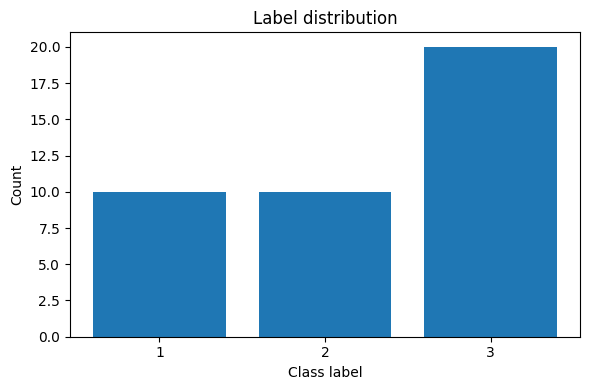

In [30]:
labeled = df[df[LABEL_COL].notna()].copy()
labeled[LABEL_COL] = labeled[LABEL_COL].astype(int)

label_counts = labeled[LABEL_COL].value_counts().sort_index()
label_df = label_counts.rename_axis("label").reset_index(name="count")
label_df.to_csv(os.path.join(OUTDIR, "01_label_distribution.csv"), index=False)

plt.figure(figsize=(6, 4))
plt.bar(label_df["label"].astype(str), label_df["count"])
plt.title("Label distribution")
plt.xlabel("Class label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Missing values for features

In [37]:
miss = (
    df[sensor_cols].isna().mean().astype(int).sort_values(ascending=False).rename("missing values").reset_index().rename(columns={"index": "feature"})
)
miss

,feature,missing values
0,Sensor 0,0
1,Sensor 1,0
2,Sensor 2,0
3,Sensor 3,0
4,Sensor 4,0
5,Sensor 5,0
6,Sensor 6,0
7,Sensor 7,0
8,Sensor 8,0
9,Sensor 9,0


In [38]:
desc = df[sensor_cols].describe().T.reset_index().rename(columns={"index": "feature"})
desc["missing fraction"] = df[sensor_cols].isna().mean().values
desc

,feature,count,mean,std,min,25%,50%,75%,max,missing fraction
0,Sensor 0,1600.0,-0.003901,0.578326,-0.998098,-0.507756,0.004809,0.476584,0.999610,0.0
1,Sensor 1,1600.0,0.010692,0.580784,-0.992518,-0.488596,0.017735,0.513715,0.999463,0.0
2,Sensor 2,1600.0,0.003611,0.359632,-0.800000,-0.259969,0.000516,0.270990,0.800000,0.0
3,Sensor 3,1600.0,0.016913,0.583571,-0.999775,-0.504151,0.051528,0.512762,0.999733,0.0
4,Sensor 4,1600.0,0.006504,0.570841,-0.999870,-0.485490,0.000811,0.495880,0.992920,0.0
5,Sensor 5,1600.0,-0.035332,0.593607,-0.999669,-0.576116,-0.051875,0.481036,0.996972,0.0
6,Sensor 6,1600.0,0.002607,0.572523,-0.996949,-0.493367,0.015700,0.484419,0.999369,0.0
7,Sensor 7,1600.0,-0.023096,0.588614,-0.998761,-0.531029,-0.043717,0.490271,0.999376,0.0
8,Sensor 8,1600.0,0.014207,0.579928,-0.998044,-0.473253,0.004869,0.503751,0.999143,0.0
9,Sensor 9,1600.0,0.001201,0.602691,-0.999523,-0.559439,0.034202,0.547635,0.999618,0.0


### Standard Deviation

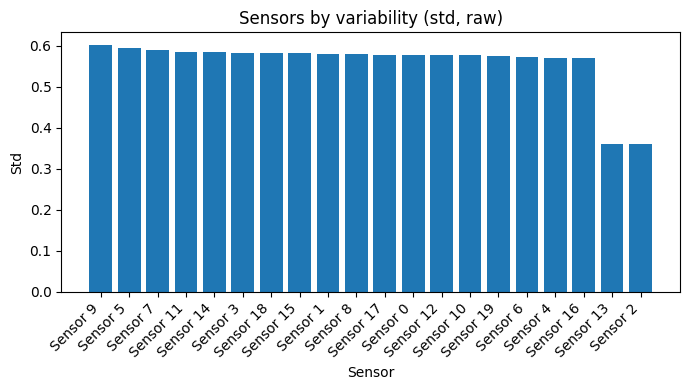

In [58]:
std_rank = desc.sort_values("std", ascending=False)[["feature", "std"]]
std_rank.to_csv(os.path.join(OUTDIR, "std_sensors.csv"), index=False)

plt.figure(figsize=(7, 4))
plt.bar(std_rank["feature"], std_rank["std"])
plt.xticks(rotation=45, ha="right")
plt.title("Sensors by variability (std, raw)")
plt.xlabel("Sensor")
plt.ylabel("Std")
plt.tight_layout()
plt.show()

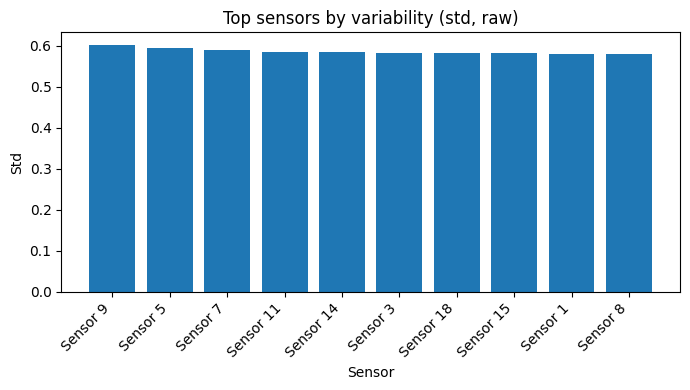

In [41]:
std_rank = desc.sort_values("std", ascending=False)[["feature", "std"]].head(10)
std_rank.to_csv(os.path.join(OUTDIR, "04_top_std_sensors.csv"), index=False)

plt.figure(figsize=(7, 4))
plt.bar(std_rank["feature"], std_rank["std"])
plt.xticks(rotation=45, ha="right")
plt.title("Top sensors by variability (std, raw)")
plt.xlabel("Sensor")
plt.ylabel("Std")
plt.tight_layout()
plt.show()

### Correlation

In [42]:
corr = df[sensor_cols].corr()
corr.to_csv(os.path.join(OUTDIR, "05_sensor_correlation_matrix.csv"))

corr_abs = corr.abs()
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
top_pairs = upper.stack().sort_values(ascending=False).head(15)
top_corr_df = (
    top_pairs.rename("abs_corr")
    .reset_index()
    .rename(columns={"level_0": "sensor_a", "level_1": "sensor_b"})
)

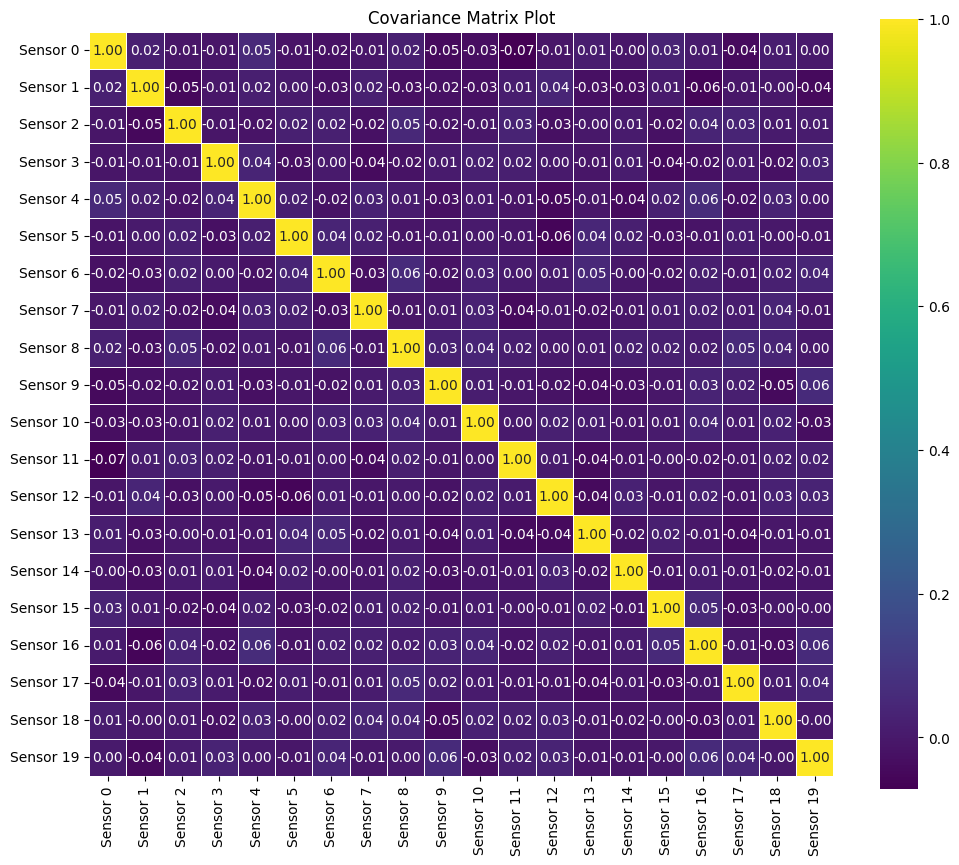

In [48]:
import seaborn as sns
plt.figure(figsize=(12, 10)) # Adjust figure size for readability
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', square=True, linewidths=.5)
plt.title('Covariance Matrix Plot')

plt.show()

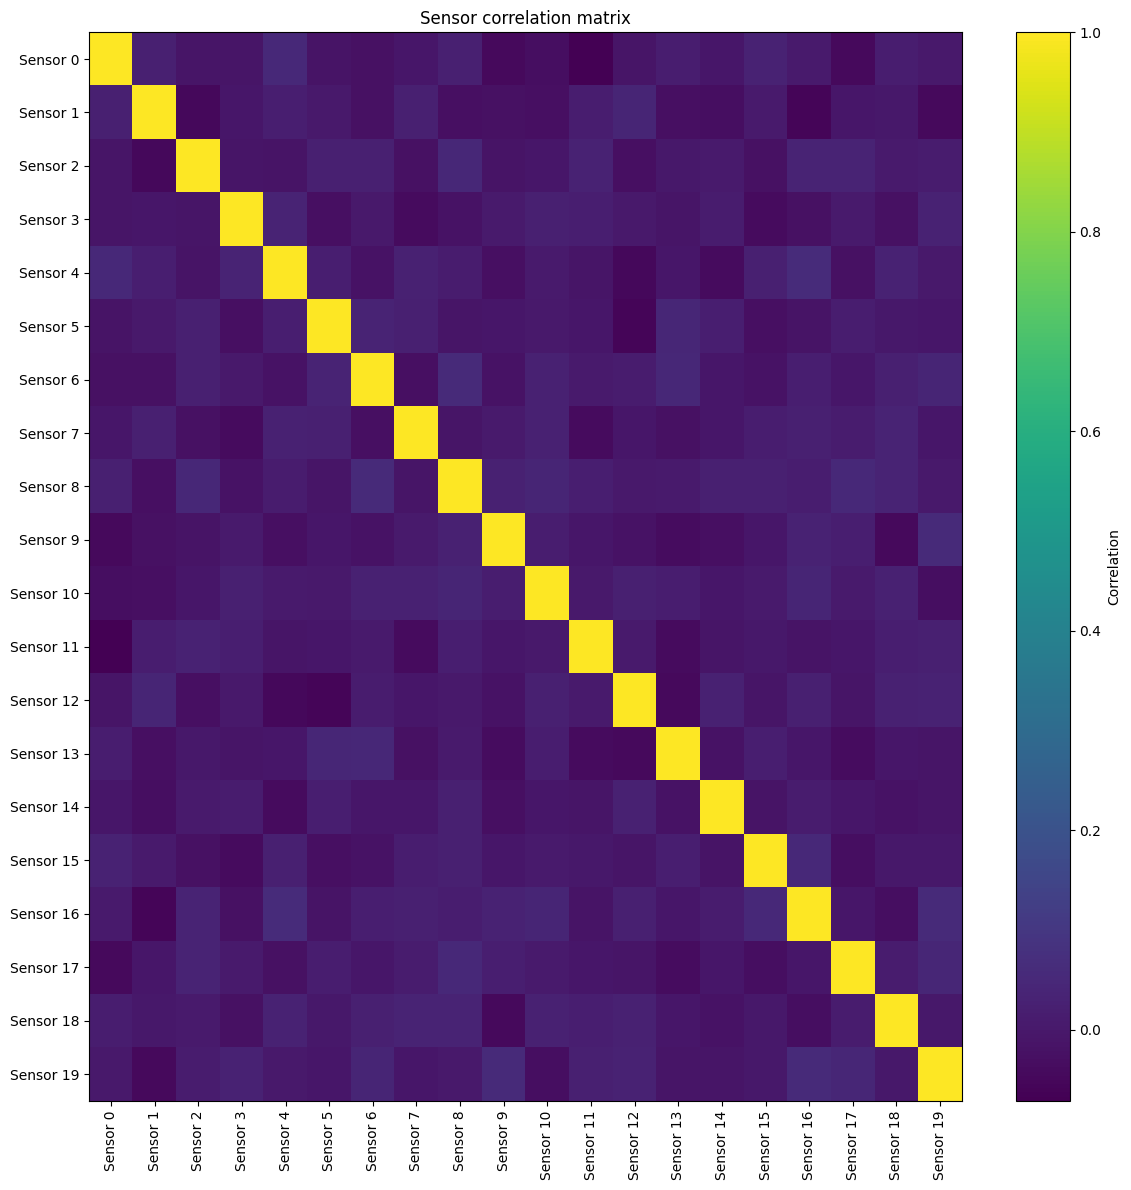

In [52]:
plt.figure(figsize=(12, 12))
plt.imshow(corr.values, aspect="auto")
plt.colorbar(label="Correlation")
plt.title("Sensor correlation matrix")
plt.xticks(range(len(sensor_cols)), sensor_cols, rotation=90)
plt.yticks(range(len(sensor_cols)), sensor_cols)
plt.tight_layout()
plt.show()

### Distribution of Sensors

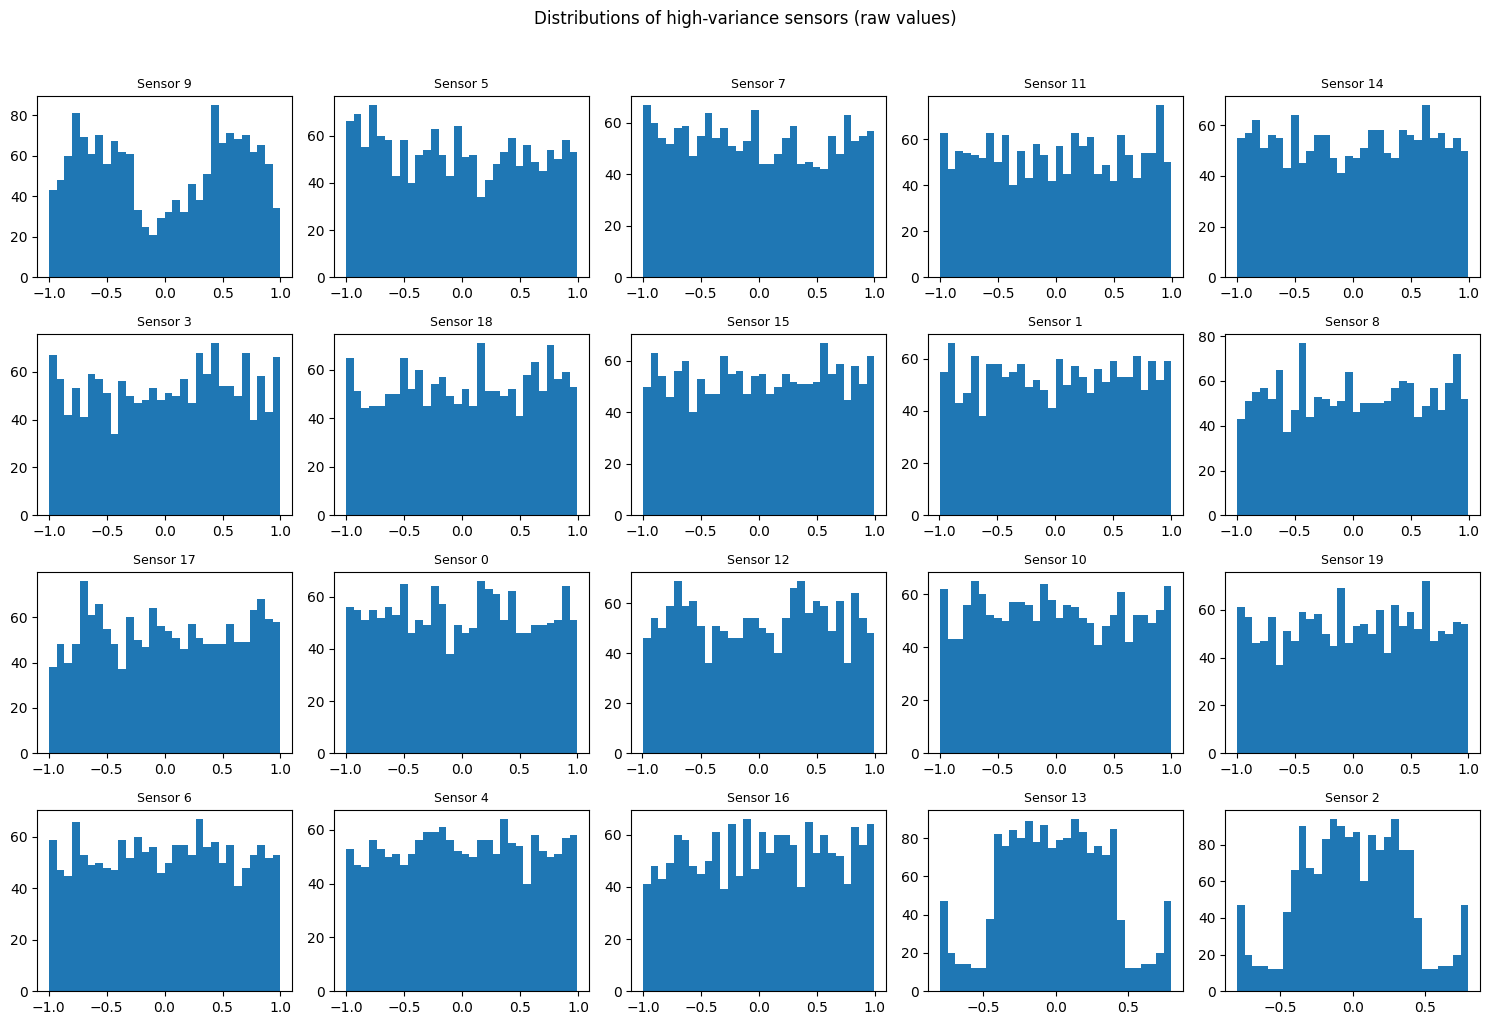

In [59]:
top_sensors = std_rank["feature"].tolist()
fig = plt.figure(figsize=(15, 10))
for i, s in enumerate(top_sensors, 1):
    ax = plt.subplot(4, 5, i)
    x = df[s].dropna().values
    ax.hist(x, bins=30)
    ax.set_title(s, fontsize=9)
fig.suptitle("Distributions of high-variance sensors (raw values)", y=1.02)
plt.tight_layout()
plt.show()